# EDA Notebook
    Made by Noah Igram for DataGlacier 
    This notebook was made for the purposes of exploring the datasets corresponding to 2 cab companies
    The goal was the provide insight to XYZ for a potential G2M strategy. 

    Specifically, the question of which cab company, if not both, should company XYZ invest in was posed.

Areas of investigation:
- Is one of the two cab companies performing better year round? - Addressed in this notebook 
- In which locations are each of the two companies most popular? - Addressed in this notebook
- What are the different demographic trends of users between the two companies? - 
- Which cab company gets more regular customers, yellow or pink? - Addressed in this notebook
- What are the profit trends for the two companies? - Addressed in this notebook
- Which company will perform better within the next 10 years? - Will address with model in week 3

Questions for investors:
- What is the investment horizon?
- What is the risk profile of the investors - are they looking for a low-risk or high-risk investment?
- 

Assumptions from data:
- The transactions which don't have a company associated are assumed to be cab rides for another company

    
    




In [199]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tabulate import tabulate
import xlrd
import statistics
from collections import Counter

# Data intake and organization

### Cab_Data.csv

In [200]:
#First csv file is Cab_Data.csv
df_Cab_Data = pd.read_csv('Cab_Data.csv')
df_Cab_Data.info()
df_Cab_Data.head()

# Immediately we can note that none of the features in this file contain any entries that are null or N/A
# There are 7 columns of data: Transaction ID, Date of Travel, Company, City, KM Travelled, Price Charged, and Cost of Trip
# respectively their Panda data types are: int64, in64, object, object, float64, float64, float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


### City.csv

In [201]:
# Second csv file is City.csv
df_City = pd.read_csv('City.csv')
df_City.info()
df_City.head()

#Description of file:
# The csv file City.csv contains 20 entries of 3 columns of data. 
# The columns of the data are: City, Population, and Users (Cab users)
# All 3 columns have Pandas data type object. There are no missing values in this dataset.

# Now we need to make a master dataset 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


### Customer_ID.csv

In [202]:
# Third csv file is Customer_ID.csv
df_c_ID = pd.read_csv('Customer_ID.csv')
df_c_ID.info()
df_c_ID.head()

# Description of file:
# The csv file Customer_ID.csv contains 49171 entries of 4 columns of data. 
# The column names are: Customer ID, Gender, age, and Income (USD/month). 
# There are no missing values in this dataset. 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


### Transaction_ID.csv

In [203]:
# Fourth csv file is Transaction_ID.csv
df_t_ID = pd.read_csv('Transaction_ID.csv')
df_t_ID.info()
df_t_ID.head()

# Description of file:
# This csv file contains 440,098 entries of 3 columns of data. 
# The columns of the data are: Transaction ID, customer ID, and Payment Mode.
# There are no missing values in the data. 

print(df_t_ID.nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
Transaction ID    440098
Customer ID        49171
Payment_Mode           2
dtype: int64


In [204]:
# Need to merge t_ID dataframe  with cab_data dataframe

df_trans = pd.merge(df_Cab_Data,df_t_ID,how='outer')
print(len(df_trans))

# Now we bring in gender age and income information by merging this transaction dataframe
# with the customer information dataframe

df_main = pd.merge(df_trans,df_c_ID,how='left')
df_main.info()
df_main.head()

440098
<class 'pandas.core.frame.DataFrame'>
Int64Index: 440098 entries, 0 to 440097
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      440098 non-null  int64  
 1   Date of Travel      359392 non-null  float64
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         440098 non-null  int64  
 8   Payment_Mode        440098 non-null  object 
 9   Gender              440098 non-null  object 
 10  Age                 440098 non-null  int64  
 11  Income (USD/Month)  440098 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 43.6+ MB


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


## Master Dataset
The following code was used to merge the datasets to get a better understanding of all of the features, and if there are any missing values

Additionally, it will be helpful for our analysis if we can get the profit for each transaction, so this column has been added by subtracting the cost of trip column from the Price charged column.

In [205]:
df_master = pd.merge(df_main, df_City, how='outer')

df_master.info()
df_master.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440099 entries, 0 to 440098
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      440098 non-null  float64
 1   Date of Travel      359392 non-null  float64
 2   Company             359392 non-null  object 
 3   City                359393 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         440098 non-null  float64
 8   Payment_Mode        440098 non-null  object 
 9   Gender              440098 non-null  object 
 10  Age                 440098 non-null  float64
 11  Income (USD/Month)  440098 non-null  float64
 12  Population          359393 non-null  object 
 13  Users               359393 non-null  object 
dtypes: float64(8), object(6)
memory usage: 50.4+ MB


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011.0,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290.0,Card,Male,28.0,10813.0,"814,885","24,701"
1,10000012.0,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703.0,Card,Male,27.0,9237.0,"814,885","24,701"
2,10000013.0,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712.0,Cash,Male,53.0,11242.0,"814,885","24,701"
3,10000014.0,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020.0,Cash,Male,23.0,23327.0,"814,885","24,701"
4,10000015.0,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182.0,Card,Male,33.0,8536.0,"814,885","24,701"


# Descriptive Analysis

## Data types and missing values

The purpose of this section was to understand the types of data being worked with as well as any missing values found after creating a master dataframe.
After creating the master dataset, we see that there are some missing data values. While there are 440,098 total transactions in the dataset, only 359,392 of the transactions
have data for all of the following features: transaction ID, Date of Travel, Company, City, KM Travelled, Price charged, cost of trip, Customer ID, payment mode, gender, age, and income (USD/Month)

To allow for a more sure analysis of the features, a decision was made to remove the rows of missing data as
we will only miss out on 18% of the entries for certain features.

In [206]:

# Below I make a table prviding info on the data types and the missing values
# For this we'll ignore population and users because these were taken at one specific time and might not represent
# the true populations and numbers of users at the time of each of the transactions in the master dataset. 

table_dict = {'Feature': ['Transaction ID','Date of Travel','Company','City','KM Travelled','Price Charged','Cost of Trip','Customer ID','Payment Mode','Gender','Age','Income (USD/Month)'], 'Dtype (Pandas)': ['float64','float64','object','object','float64','float64','float64','float64','object','object','float64','float64'], 'Dtype (py)': ['float','float','string','string','float','float','float','float','string','string','float','float'], 'Missing values': [0, 80706,80706,80706,80706,80706,80706,0,0,0,0,0],'% Missing': [0,18.3,18.3,18.3,18.3,18.3,18.3,0,0,0,0,0,]}
table_df = pd.DataFrame(data=table_dict)
print(tabulate(table_df,showindex=False,headers='keys',numalign='center',tablefmt='fancy_grid'))


╒════════════════════╤══════════════════╤══════════════╤══════════════════╤═════════════╕
│ Feature            │ Dtype (Pandas)   │ Dtype (py)   │  Missing values  │  % Missing  │
╞════════════════════╪══════════════════╪══════════════╪══════════════════╪═════════════╡
│ Transaction ID     │ float64          │ float        │        0         │      0      │
├────────────────────┼──────────────────┼──────────────┼──────────────────┼─────────────┤
│ Date of Travel     │ float64          │ float        │      80706       │    18.3     │
├────────────────────┼──────────────────┼──────────────┼──────────────────┼─────────────┤
│ Company            │ object           │ string       │      80706       │    18.3     │
├────────────────────┼──────────────────┼──────────────┼──────────────────┼─────────────┤
│ City               │ object           │ string       │      80706       │    18.3     │
├────────────────────┼──────────────────┼──────────────┼──────────────────┼─────────────┤
│ KM Trave

### Final revisions to dataset

Here we remove the rows with missing values, and change the column data types back to their original type (they were changed when merge() was used)
We also add in the profit column as this well help us answer our hypotheses.

Because the 'Date of Travel' column is made up of dates in excel form, we also change the format to month/day/year

In [207]:
df_master.dropna(inplace=True)
# We can also see above that transaction ID and date of travel were changed into floats after merging-let's change these back
df_master = df_master.astype({'Transaction ID': 'int64'})
df_master = df_master.astype({'Date of Travel': 'int64'})
df_master = df_master.astype({'Customer ID': 'int64'})
df_master = df_master.astype({'Age': 'int64'})
df_master = df_master.astype({'Income (USD/Month)': 'int64'})

#Add profit column
df_master['Profit'] = df_master['Price Charged'] - df_master['Cost of Trip']

# Change date of travel format from excel format to pandas datetime

def read_date(date):
    return xlrd.xldate.xldate_as_datetime(date,0)

df_master['Date'] = pd.to_datetime(df_master['Date of Travel'].apply(read_date),errors='coerce')

#rearrange columns
df_master = df_master[['Transaction ID', 'Date','Company','City','KM Travelled','Price Charged','Cost of Trip','Customer ID','Payment_Mode','Profit','Gender','Age','Income (USD/Month)','Population','Users','Date of Travel']]
df_master = df_master.drop('Date of Travel', axis=1)

df_master.head()


,Transaction ID,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Profit,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,57.315,Male,28,10813,"814,885","24,701"
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,23.666,Male,27,9237,"814,885","24,701"
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,27.568,Male,53,11242,"814,885","24,701"
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,25.798,Male,23,23327,"814,885","24,701"
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,16.844,Male,33,8536,"814,885","24,701"


### Analysis of Numerical features

In [208]:
# numerical features to analyze are KM travelled, price charged, cost of trip, age, income
# For right now we will ignore transaction and customer IDs as these seem rather arbitrary 
# other than the fact that transaction ID might describe the order in which transactions occur

# statistics to generate are min, max, range, 25%, 75%, IQR, mode, median, mean, standard deviation

num_features = ['KM Travelled','Price Charged','Cost of Trip','Age','Income (USD/Month)']
mins = [0]*5
maxs = [0]*5
ranges = [0]*5
q1s = [0]*5
q3s = [0]*5
iqrs = [0]*5
modes = [0]*5
medians = [0]*5
means = [0]*5
stds = [0]*5

#Lets create a dataframe to hold all of the statistics:
dict_stat = {'Feature': ['KM Travelled','Price Charged','Cost of Trip','Age','Income (USD/Month)']}
df_stat = pd.DataFrame(dict_stat)
df_stat['Min'] = 0
df_stat['Max'] = 0
df_stat['Range'] = 0
df_stat['25%'] = 0
df_stat['50%'] = 0
df_stat['75%'] = 0
df_stat['IQR']= 0
df_stat['Mean'] = 0
df_stat['St. dev'] = 0


ii=0
for feature in num_features:
    df_stat['Min'][ii] = np.min(df_master[feature])
    
    df_stat['Max'][ii] = np.max(df_master[feature])
    df_stat['Range'][ii] = df_stat['Max'][ii] - df_stat['Min'][ii]
    df_stat['25%'][ii] = np.percentile(df_master[feature],25)
    df_stat['50%'][ii] = np.percentile(df_master[feature],50)
    df_stat['75%'][ii]= np.percentile(df_master[feature],75)
    df_stat['IQR'][ii] = df_stat['75%'][ii] - df_stat['25%'][ii]
    df_stat['Mean'][ii] = np.mean(df_master[feature])
    df_stat['St. dev'][ii] = np.std(df_master[feature])
    ii = ii + 1

print(tabulate(df_stat,showindex=False,headers='keys',numalign='center',tablefmt='fancy_grid'))



/var/folders/8s/859bq84959nfw8d8mzv1kmy00000gn/T/ipykernel_7814/3326619820.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stat['Min'][ii] = np.min(df_master[feature])
/var/folders/8s/859bq84959nfw8d8mzv1kmy00000gn/T/ipykernel_7814/3326619820.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stat['Max'][ii] = np.max(df_master[feature])
/var/folders/8s/859bq84959nfw8d8mzv1kmy00000gn/T/ipykernel_7814/3326619820.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

╒════════════════════╤═══════╤═══════╤═════════╤═══════╤═══════╤═══════╤═══════╤════════╤═══════════╕
│ Feature            │  Min  │  Max  │  Range  │  25%  │  50%  │  75%  │  IQR  │  Mean  │  St. dev  │
╞════════════════════╪═══════╪═══════╪═════════╪═══════╪═══════╪═══════╪═══════╪════════╪═══════════╡
│ KM Travelled       │   1   │  48   │   47    │  12   │  22   │  32   │  20   │   22   │    12     │
├────────────────────┼───────┼───────┼─────────┼───────┼───────┼───────┼───────┼────────┼───────────┤
│ Price Charged      │  15   │ 2048  │  2033   │  206  │  386  │  583  │  377  │  423   │    274    │
├────────────────────┼───────┼───────┼─────────┼───────┼───────┼───────┼───────┼────────┼───────────┤
│ Cost of Trip       │  19   │  691  │   672   │  151  │  282  │  413  │  262  │  286   │    157    │
├────────────────────┼───────┼───────┼─────────┼───────┼───────┼───────┼───────┼────────┼───────────┤
│ Age                │  18   │  65   │   47    │  25   │  33   │  42   │  17   │  

<AxesSubplot:xlabel='Income (USD/Month)', ylabel='Count'>

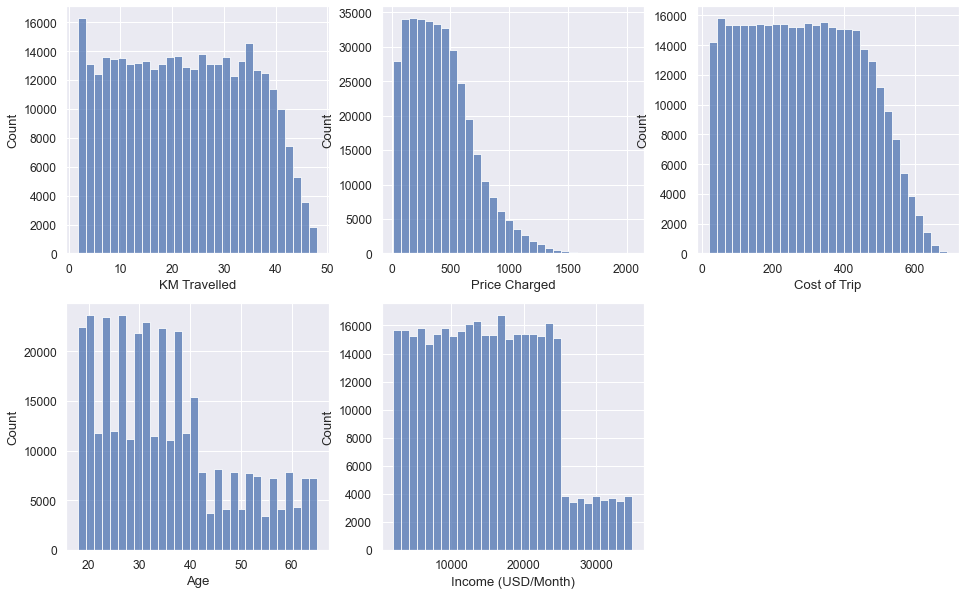

In [209]:
#Histogram of numerical attributes

fig, axes = plt.subplots(2,3,figsize=(16,10))
ax1 = axes[0,0]
ax2 = axes[0,1]
ax3 = axes[0,2]
ax4 = axes[1,0]
ax5 = axes[1,1]
axes[-1,-1].axis('off')

sns.histplot(df_master['KM Travelled'],ax=ax1,bins=30)
sns.histplot(df_master['Price Charged'],ax=ax2,bins=30)
sns.histplot(df_master['Cost of Trip'],ax=ax3,bins=30)
sns.histplot(df_master['Age'],ax=ax4,bins=30)
sns.histplot(df_master['Income (USD/Month)'],ax=ax5,bins=30)

### Analysis of categorical features

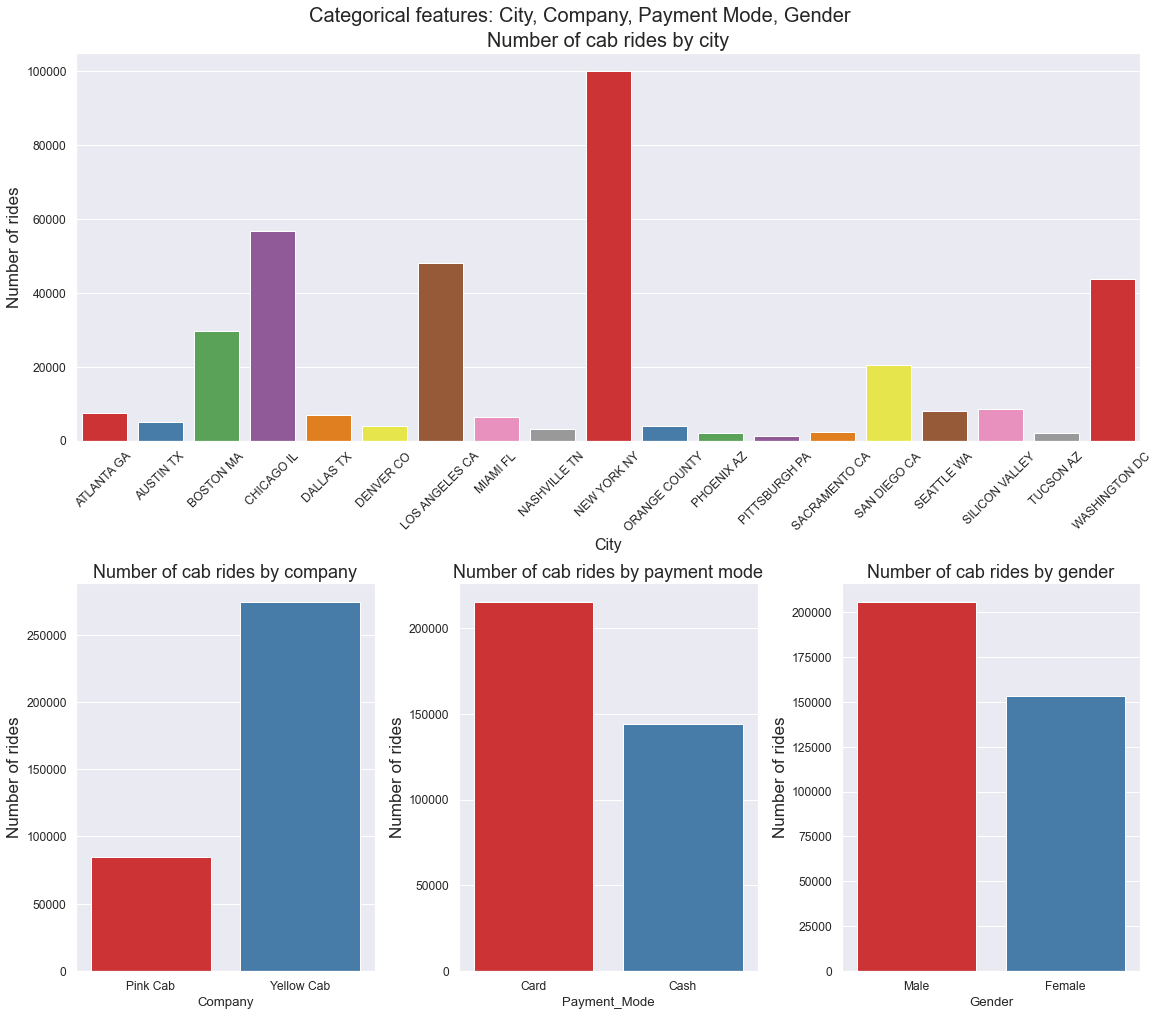

In [288]:
#The categorical attributes of the data are: Company, City, Payment Mode, Gender

#Histograms of categorical data:

fig = plt.figure(figsize=(16, 14), constrained_layout=True)
spec = fig.add_gridspec(2, 3)
ax0 = fig.add_subplot(spec[0, :])
ax10 = fig.add_subplot(spec[1, 0])
ax11 = fig.add_subplot(spec[1, 1])
ax12 = fig.add_subplot(spec[1,2])
fig.suptitle('Categorical features: City, Company, Payment Mode, Gender',fontsize=20)


sns.countplot(x=df_master['City'],ax=ax0,palette='Set1')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45)
ax0.set_xlabel('City',fontsize=16)
ax0.set_title('Number of cab rides by city',fontsize=20)
ax0.set_ylabel('Number of rides',fontsize=17)

sns.countplot(x=df_master['Company'],ax=ax10,palette='Set1')
ax10.set_title('Number of cab rides by company',fontsize=18)
ax10.set_ylabel('Number of rides',fontsize=17)
sns.countplot(x=df_master['Payment_Mode'],ax=ax11,palette='Set1')
ax11.set_title('Number of cab rides by payment mode',fontsize=18)
ax11.set_ylabel('Number of rides',fontsize=17)
sns.countplot(x=df_master['Gender'],ax=ax12,palette='Set1')
ax12.set_title('Number of cab rides by gender',fontsize=18)
ax12.set_ylabel('Number of rides',fontsize=17)
# ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
# ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
# ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)
plt.show()


## Correlation Analysis

### Categorical vs. Categorical

### Numerical vs numerical

╒════════════════════╤════════════════╤═════════════════╤════════════════╤══════════════╤══════════════════════╕
│                    │  KM Travelled  │  Price Charged  │  Cost of Trip  │     Age      │  Income (USD/Month)  │
╞════════════════════╪════════════════╪═════════════════╪════════════════╪══════════════╪══════════════════════╡
│ KM Travelled       │       1        │    0.835753     │    0.981848    │ -0.000368661 │     -0.000544062     │
├────────────────────┼────────────────┼─────────────────┼────────────────┼──────────────┼──────────────────────┤
│ Price Charged      │    0.835753    │        1        │    0.859812    │ -0.00308425  │      0.00322778      │
├────────────────────┼────────────────┼─────────────────┼────────────────┼──────────────┼──────────────────────┤
│ Cost of Trip       │    0.981848    │    0.859812     │       1        │ -0.000188553 │     -0.000633006     │
├────────────────────┼────────────────┼─────────────────┼────────────────┼──────────────┼───────

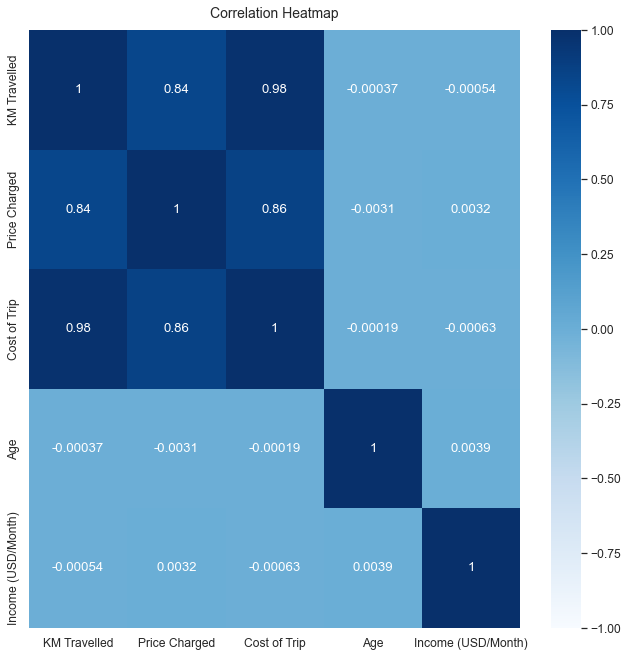

In [211]:
# First let's make a new dataframe that only includes the numerical attributes of the data
# 'KM Travelled','Price Charged','Cost of Trip','Age','Income (USD/Month)'

df_num = df_master[['KM Travelled','Price Charged','Cost of Trip','Age','Income (USD/Month)']].copy()

# Create correlation matrix
corr_num = df_num.corr()

plt.figure(figsize=(11,11))
heatmap = sns.heatmap(corr_num, vmin=-1,vmax=1,annot=True,cmap='Blues')
heatmap.set_title('Correlation Heatmap',fontdict={'fontsize':14},pad=12)
print(tabulate(corr_num,showindex=True,headers='keys',numalign='center',tablefmt='fancy_grid'))



Unsurprisingly, the features that are most correlated are Cost of Trip, KM Travelled, and Price Charged. This makes sense because the price charged should increase as the trip distance increases. 

Age and income are not correlated, and neither of those two are correlataed with any of the 3 features mentioned above. 

## Analysis of Hypotheses

### Profit Analysis

To analyze the profits of the two cab companies, first we must break the dataframe into two dateframes, one with transactions from Yellow Cab and one with transactions from Pink Cab

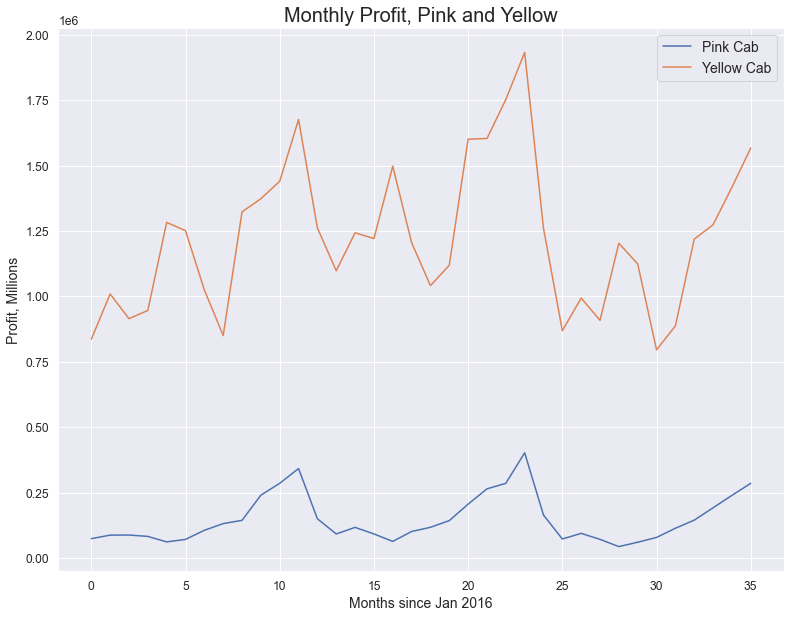

The average profit per ride for Yellow Cab is 160.25998584102948
The average profit per ride for Pink Cab is 62.652174109619466


In [212]:
# Split up transaction data by company
df_pink = df_master[df_master['Company']=='Pink Cab']
df_pink = df_pink.reset_index(drop=True)
df_yellow = df_master[df_master['Company']=='Yellow Cab']
df_yellow = df_yellow.reset_index(drop=True)

df_yellow.head()


# Gather monthly profit data for each company. 

#Initialize list to hold monthly profits for each company
monthly_pink = [0]*36
monthly_yellow = [0]*36

# First Ill change the index of the dateframe to dates for easier access
df_pink = df_pink.set_index(df_pink['Date'])
df_pink = df_pink.sort_index()
df_yellow = df_yellow.set_index(df_yellow['Date'])
df_yellow = df_yellow.sort_index()

# Loop through months and sum profits each month
current_date = pd.Timestamp(2016,1,1)


for ii in range(36):

    end_date = current_date + pd.DateOffset(days=current_date.days_in_month)
    
    profit_p = sum(df_pink['Profit'][current_date:end_date - pd.DateOffset(days=1)]) 
    monthly_pink[ii] = profit_p
    profit_y = sum(df_yellow['Profit'][current_date:end_date - pd.DateOffset(days=1)])
    monthly_yellow[ii] = profit_y
    current_date = end_date

    
fig = plt.figure(figsize=(13,10))
plt.plot(monthly_pink,label='Pink Cab')
plt.plot(monthly_yellow,label='Yellow Cab')
plt.xlabel('Months since Jan 2016',fontsize=14)
plt.ylabel('Profit, Millions',fontsize=14)
plt.legend(fontsize=14)
plt.title('Monthly Profit, Pink and Yellow',fontsize=20)
plt.show()
profit_per_ride_yellow = sum(df_yellow['Profit'])/len(df_yellow['Profit'])
profit_per_ride_pink = sum(df_pink['Profit'])/len(df_pink['Profit'])
print('The average profit per ride for Yellow Cab is ' + str(profit_per_ride_yellow))
print('The average profit per ride for Pink Cab is ' + str(profit_per_ride_pink))

### Conclusions for profit analysis
We see from the above figure that the Yellow company is clearly pulling in more profits year round. Based on this alone, investing in the Yellow company between Jan 2016 and Decemeber 2018 would have yielded better ROI than if one had invested in the Pink company. Additionally, Yellow Cab pulls in approximately 2.6 times more profit per cab ride. 

Another conclusion that can be made from this graph is that the yellow company has greater fluctuations in profit and as well as more frequent fluctuations in profit, than the Pink company. throughout the 3 year period, the Yellow company's profits drastically change month to month. On the other hand, the Pink company's profits steadily increase across months, reach a peak, and then eventually fall close to original levels. 

It is hard to predict the future profits of the two companies based on their profits alone. To do this however, we should create a model that predicts profit to forecast future profits and give the best investment advice for a 5 year and 10 year investment horizon. 

## User Analysis

In this section we explore the demographic trends related to the cab companies' transactions. The goal is to understand which company users prefer, and which company we predict will retain and gain more users in the coming future. 

First we explore the number of cab rides for each company in each city. 

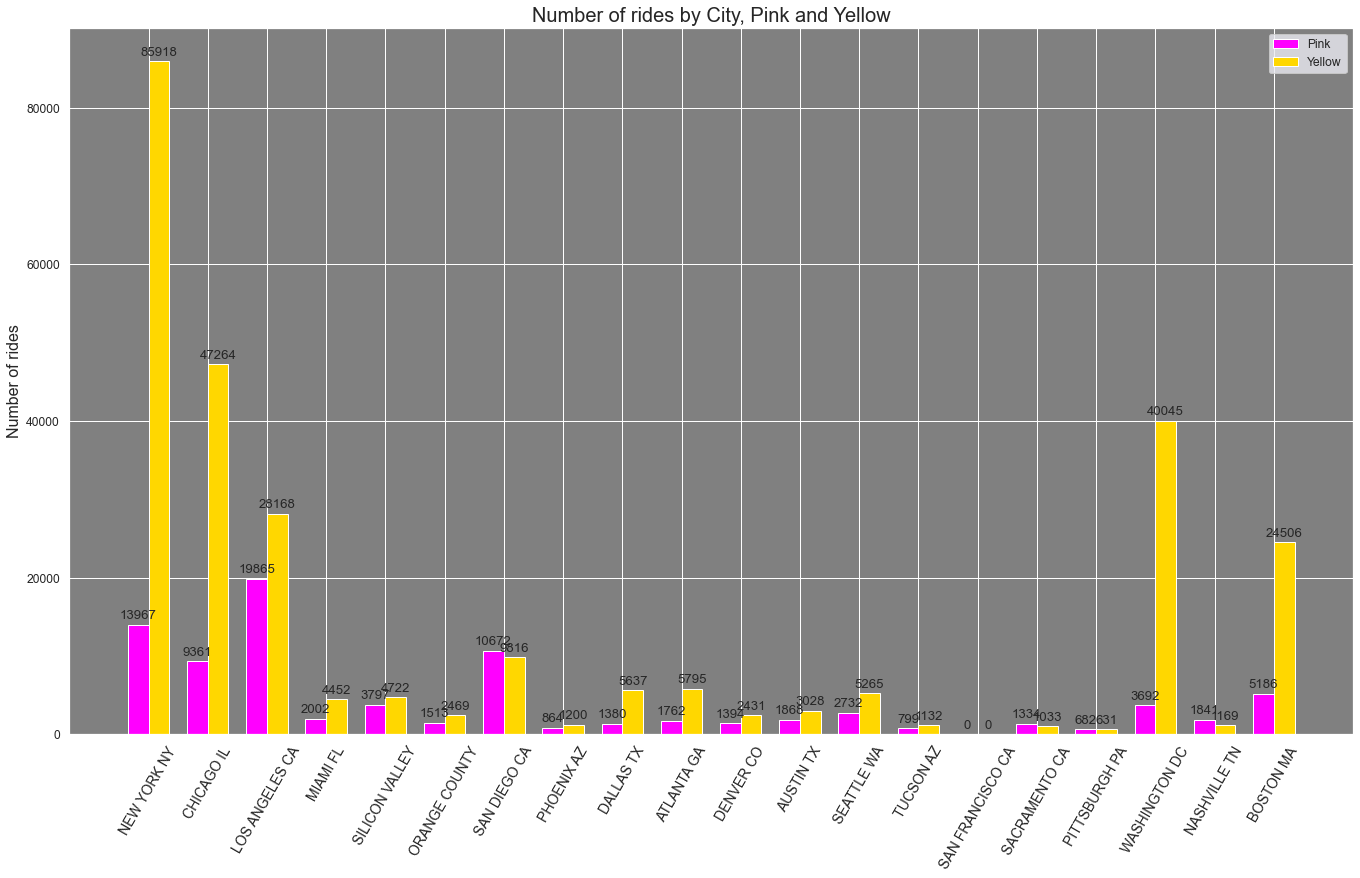

In [242]:
#Create list of cities
cities = list(df_City['City'])
yellow_trans = [0]*len(cities)
pink_trans = [0]*len(cities)
ii=0
for city in cities:
    pink_trans[ii] = len(df_pink[df_pink['City'] == city])
    yellow_trans[ii] = len(df_yellow[df_yellow['City']==city])
    ii = ii+1

x = np.arange(len(cities))
width=0.35
fig, ax = plt.subplots(figsize=(23,13))
rects1 = ax.bar(x - width/2, pink_trans, width, label='Pink',color='#ff00ff')
rects2 = ax.bar(x+width/2, yellow_trans, width, label='Yellow',color='#ffd700')

ax.set_ylabel('Number of rides',fontsize=16)
ax.set_title('Number of rides by City, Pink and Yellow',fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(cities,fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
ax.legend()
ax.set_facecolor('grey')
ax.bar_label(rects1,padding = 3)
ax.bar_label(rects2,padding=3)

plt.show()
    

We see that Yellow Cab completes more cab rides in most cities- the exceptions are Orange County, San Diego, Sacramento, Pittsburgh, . Based on this solely, it seems like Yellow Cab is more popular but it might be that Yellow Cab has been around for longer and as a result has more cabs available. To better understand how customers view the two companies, we should try and understand the regularity of customers for each company (If one company has more regular or repeat users), as well as how the number of users has changed overtime. This will allow us to better predict user growth between the two companies. 

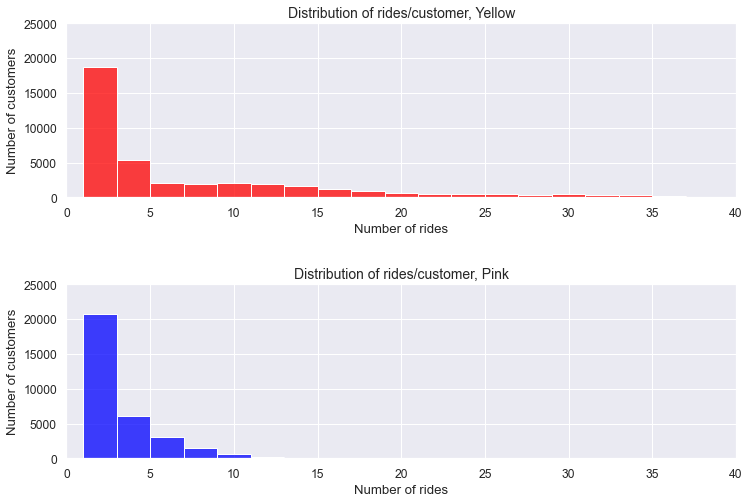

In [241]:
# Here we analyze the number of rides per user for each company
# We can make histograms

# Dictionary with Customer IDs and number of cab rides for that ID
customers_y = Counter(df_yellow['Customer ID'])
customers_p = Counter(df_pink['Customer ID'])

fig, axes = plt.subplots(2,1,figsize=(12,8))
ax1 = axes[0]
ax2 = axes[1]

sns.histplot(customers_y,ax=ax1,binwidth=2,color='red')
ax1.set_xlabel('Number of rides')
ax1.set_ylabel('Number of customers')
ax1.set_title('Distribution of rides/customer, Yellow',fontsize=14)
ax1.set_xlim(left=0,right=40)
ax1.set_ylim(bottom=0,top=25000)
sns.histplot(customers_p,ax=ax2,binwidth=2,color='blue')
ax2.set_xlabel('Number of rides')
ax2.set_ylabel('Number of customers')
ax2.set_title('Distribution of rides/customer, Pink',fontsize=14)
ax2.set_xlim(left=0,right=40)
ax2.set_ylim(bottom=0,top=25000)
plt.subplots_adjust(hspace=0.5)

The distributions above show that Yellow Cab gets significantly more regular and repeat users than Pink Cab. 

## Age 

Here we explore the ages of customers using each of the two companies. The goal is to determine which age groups tend to use which Cab service. 

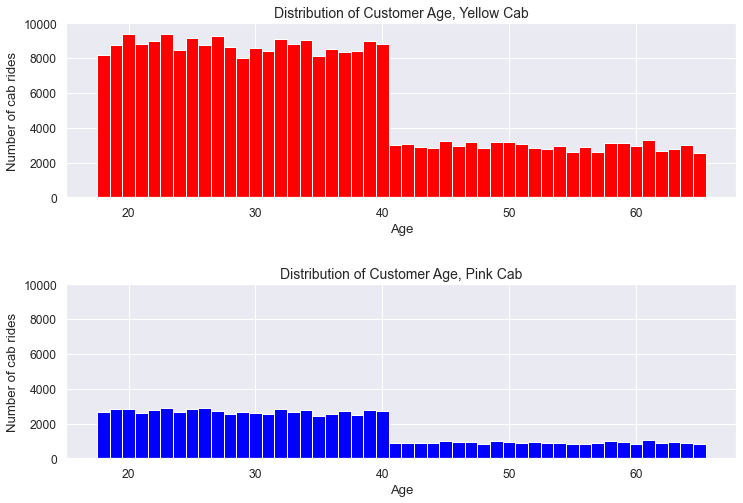

In [279]:
# We'll plot the distribution of passenger age for all the transactions corresponding to each company. 
ages_yellow = Counter(df_yellow['Age'])
ages_pink = Counter(df_pink['Age'])

fig, axes = plt.subplots(2,1,figsize=(12,8))
ax1 = axes[0]
ax2 = axes[1]

ax1.bar(list(ages_yellow.keys()),list(ages_yellow.values()),color='red',width=1)
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of cab rides')
ax1.set_title('Distribution of Customer Age, Yellow Cab',fontsize=14)

ax1.set_ylim(bottom=0,top=10000)
ax2.bar(list(ages_pink.keys()),list(ages_pink.values()),width=1,color='blue')
ax2.set_xlabel('Age')
ax2.set_ylabel('Number of cab rides')
ax2.set_title('Distribution of Customer Age, Pink Cab',fontsize=14)
ax2.set_ylim(bottom=0,top=10000)
plt.subplots_adjust(hspace=0.5)

The above plot shows that age does not have much of an effect on which cab company a rider uses. Both companies have most of their customer base between 20 and 40 years old, and the rest fall into the 40-60 years range. 

## Conclusions

Although a model is to be made in week 3 to explore the datasets further, the information gained in this notebook is helpful in understanding the general trends of the two companies and how they have performed from Jan. 2016 to Dec. 2018. It was found that Yellow Cab is likely a much better investment because of their customer reach and higher profits within this time period. Another key finding was that Yellow Cab is charging more per cab, making a higher profit per cab, and still retaining more customers. This might indicate that Yellow is taking advantage of some inelasticity in the demand for cabs, meaning they are realizing they can charge a higher price while still being able to pull in customers. This might explain why Yellow Cab makes significantly more profit per cab ride than Pink Cab. 

It should be noted however that the drastic changes in Yellow Cab's profits month to month potentially make it a higher risk investment than Pink Cab. 

Key Findings:
- Yellow Cab is making approximately 2.5x more $ per cab than Pink Cab
- Yellow Cab pulls in significantly more profits than Pink Cab, but Yellow Cab's profits are much more volatile
- Age does not seem to affect which cab company a rider uses
- Yellow Cab seems to have a much better pricing model than Pink Cab